In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib inline
from merger import merge_adjacent_energy

### Importing the data

We are using the Electron Region data.

In [2]:
event_data = pd.read_csv("output_data/Event_one_Electron.csv") # Electron Region Event one

In [3]:
# View the merged data head
event_data.head()

,event,eta,phi,et,position,electron,tau
0,1,0,0,7.23932,3,0,0
1,1,0,1,14.78990,6,0,1
2,1,0,2,8.17547,4,0,1
3,1,0,3,6.89318,2,0,0
4,1,0,4,9.89150,7,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [4]:
# Check the shape of the merged dataframe
event_data.shape

(252, 7)

### Electron values

In [5]:
# Convert the series into a 14x18 matrix
x_elec = np.array(event_data['electron'])
matrix_electron = np.asmatrix(x_elec)

# Resizing into size 14x18
matrix_electron.resize((14, 18))

Plotting the values of matrix on 2D plot

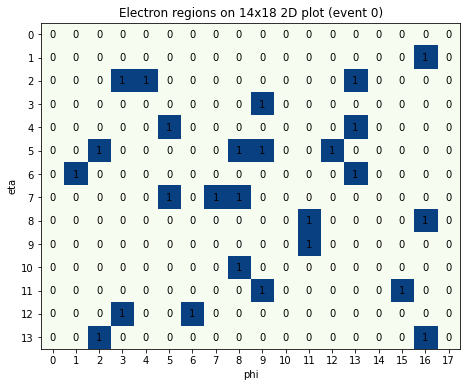

In [6]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_electron, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_electron.shape[0]))
plt.xticks(range(matrix_electron.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_electron.shape[0]):
    for y in range(matrix_electron.shape[1]):
        ax.annotate(str(matrix_electron[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

Let us check our code for merging these two region energies in the coordinates **(2,3) and (2,4)**.

<img src="images/test1.PNG">

### Position values

In [7]:
# Convert the series into a 14x18 matrix
x_pos = np.array(event_data['position'])
matrix_position = np.asmatrix(x_pos)

# Resizing into size 14x18
matrix_position.resize((14, 18))

Plotting the values of matrix on 2D plot

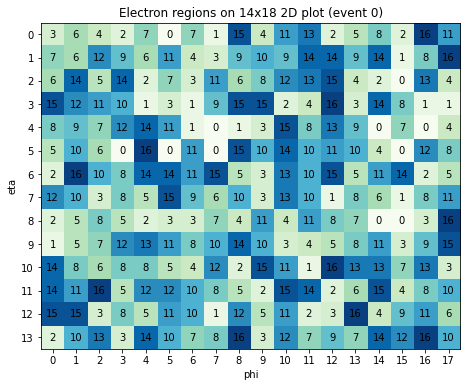

In [8]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_position, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_position.shape[0]))
plt.xticks(range(matrix_position.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_position.shape[0]):
    for y in range(matrix_position.shape[1]):
        ax.annotate(str(matrix_position[x, y]), xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

We have set the position of Electron = True to be **(14,2)** which means that both of these bits are neighbours (as shown in our 4x4 UCT region position).

<img src="images/test2.PNG">

### ET values

In [9]:
# Convert the series into a 14x18 matrix
x_et = np.array(event_data['et'])
matrix_et = np.asmatrix(x_et)

# Resizing into size 14x18
matrix_et.resize((14, 18))

In [10]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(matrix_et)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,3.714120,12.435900,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


Note here that the values at position **(2,3)** and **(2,4)** have energies **3.714120** and **12.435900** respectively.

### Tau values

In [11]:
# Convert the series into a 14x18 matrix
x_tau = np.array(event_data['tau'])
matrix_tau = np.asmatrix(x_tau)

# Resizing into size 14x18
matrix_tau.resize((14, 18))

Plotting the values of matrix on 2D plot

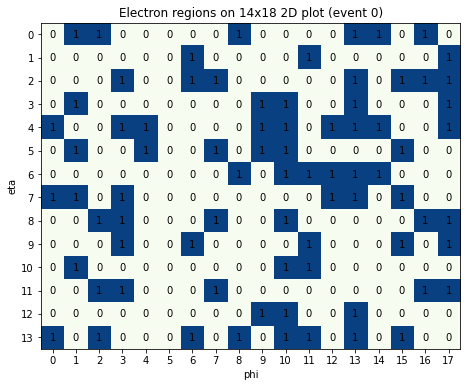

In [12]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_tau, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_tau.shape[0]))
plt.xticks(range(matrix_tau.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_tau.shape[0]):
    for y in range(matrix_tau.shape[1]):
        ax.annotate(str(matrix_tau[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

### Find neighbouring electrons and merge their energies

Find adjacent electron True bits and check if their position matches our horizontal or vertical list of bordering positions.

In [13]:
energy_elec = merge_adjacent_energy(matrix_electron, matrix_et, matrix_position)

Plotting the values of matrix on 2D plot

In [14]:
cm = sns.light_palette("blue", as_cmap = True)
x = pd.DataFrame(energy_elec)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,0.000000,16.150020,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


We can see that in the coordinate (2,3) and (2,4), the energies have been merged, i.e.,

the values at position **(2,3)** and **(2,4)** had energies as **3.714120** and **12.435900** respectively, which has now been changed to **0** and **16.150020** respectively.

Finding adjacent positions of tau signals and merging 

In [15]:
energy_final = merge_adjacent_energy(matrix_tau, energy_elec, matrix_position)

Plotting the values of matrix on 2D plot

In [16]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(energy_final)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,0.000000,16.150020,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


Add energy value back into dataframe.

In [17]:
type(energy_final)

numpy.ndarray

In [20]:
event_data['et'] = energy_final.reshape(-1, 1)

In [22]:
event_data.to_csv('output_data/merged_energy_electron_data.csv', index=False)

Find if signal is electron or tau.

Next step: Test and try code on multiple kind of data patterns.